In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


CNN neurol Network yordamida image classification

In [ ]:
dataset_path = '/content/drive/MyDrive/ML darsi/Deep learning projects'



In [ ]:
dataset_path

'/content/drive/MyDrive/ML darsi/Deep learning projects'

In [2]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [3]:


count = 0
dirs = os.listdir('/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Image_classification/Images')



for dir in dirs:
    dir_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Image_classification/Images', dir)  # Full directory path
    if os.path.isdir(dir_path):  # Check if it's a directory
        files = list(os.listdir(dir_path))
        print(f'{dir} Folder has {len(files)} Images')
        count += len(files)

print(f'Images Folder has {count} Images')


rose Folder has 804 Images
tulip Folder has 984 Images
dandelion Folder has 1052 Images
sunflower Folder has 743 Images
daisy Folder has 764 Images
Images Folder has 4347 Images


In [ ]:
#Load Images into Arrays as Dataset

In [4]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Image_classification/Images'  # rasmlar saqlangan papka manzili
img_size = 180
batch = 32

In [5]:
#Train va Validation datasetlarni yaratish
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123, # random_state
                                                       validation_split=0.2,
                                                       subset = 'training',  # faqat training
                                                       batch_size=batch,  # 32 xar bir partiyada nechta rasm o'rgatishini ko'rsatadi
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4347 files belonging to 5 classes.
Using 3478 files for training.
Found 4347 files belonging to 5 classes.
Using 869 files for validation.


In [6]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [7]:
import matplotlib.pyplot as plt

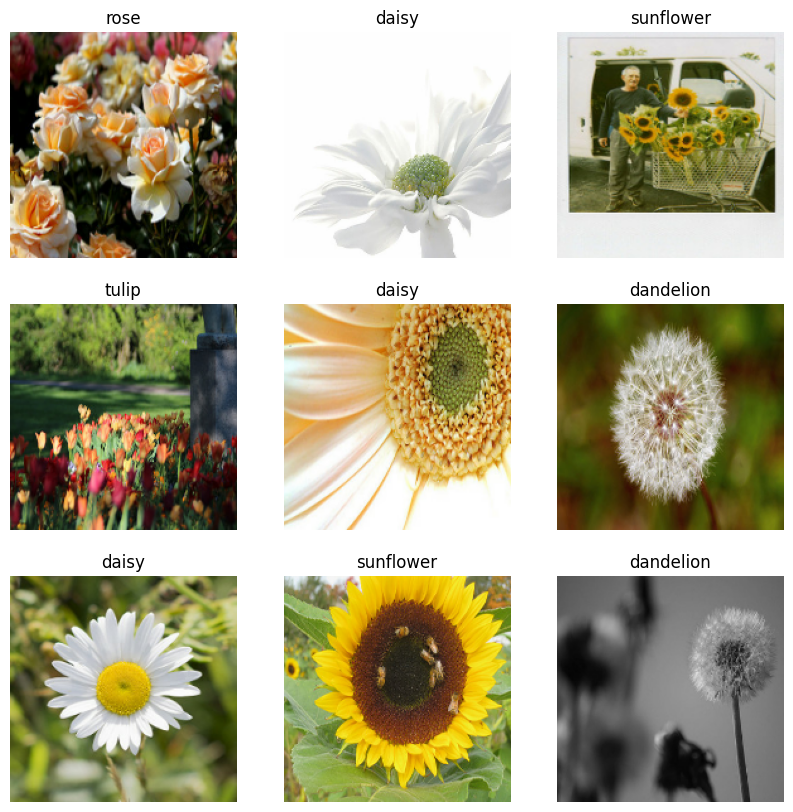

In [8]:
# train dataset ichidagi tasvirlarni vizual ko‘rinishda ko‘rsatish
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):   #  train datasetda 1 ta batch
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')



# i = 0
# plt.figure(figsize=(10,10))

# for images, labels in train_ds.take(1):
#     for i in range(9):
#         images = data_augmentation(images)
#         plt.subplot(3,3, i+1)
#         plt.imshow(images[0].numpy().astype('uint8'))
#         plt.axis('off')

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier

# # Pipeline yaratish
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),          # Avtomatik normalizatsiya
#     ('classifier', RandomForestClassifier(n_estimators=100, random_state=123))  # Model
# ])

# # Modelni o‘qitish
# pipeline.fit(X_train, y_train)

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE) #Ma’lumotlarni Keshga Saqlash->RAM-> Epoch,  Ma’lumotlarni Oldindan Tayyorlash=prefetch

In [11]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
#Data Augmentation

In [12]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


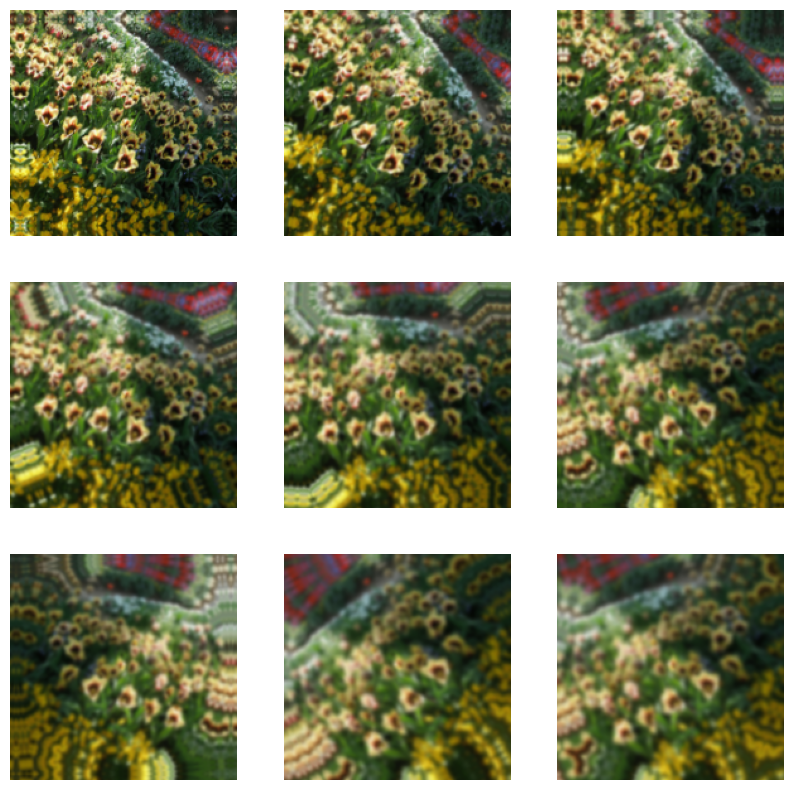

In [13]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [ ]:
#Model Creation

In [14]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(train_ds, epochs=16, validation_data=val_ds)

Epoch 1/16
109/109 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.3771 - loss: 1.3999 - val_accuracy: 0.5213 - val_loss: 1.1364
Epoch 2/16
109/109 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.5471 - loss: 1.0928 - val_accuracy: 0.5524 - val_loss: 1.0771
Epoch 3/16
109/109 ━━━━━━━━━━━━━━━━━━━━ 107s 979ms/step - accuracy: 0.6078 - loss: 1.0025 - val_accuracy: 0.5696 - val_loss: 1.1077
Epoch 4/16
109/109 ━━━━━━━━━━━━━━━━━━━━ 107s 985ms/step - accuracy: 0.6367 - loss: 0.9097 - val_accuracy: 0.6168 - val_loss: 0.9590
Epoch 5/16
109/109 ━━━━━━━━━━━━━━━━━━━━ 106s 973ms/step - accuracy: 0.6631 - loss: 0.8744 - val_accuracy: 0.6571 - val_loss: 0.9229
Epoch 6/16
109/109 ━━━━━━━━━━━━━━━━━━━━ 105s 966ms/step - accuracy: 0.6759 - loss: 0.8242 - val_accuracy: 0.6536 - val_loss: 0.8900
Epoch 7/16
109/109 ━━━━━━━━━━━━━━━━━━━━ 106s 975ms/step - accuracy: 0.7041 - loss: 0.7698 - val_accuracy: 0.6513 - val_loss: 0.9057
Epoch 8/16
109/109 ━━━━━━━━━━━━━━━━━━━━ 106s 970ms/step - accuracy: 0.7081 - loss:

In [19]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'Bu rasm tegishli ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [21]:
classify_images('/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Image_classification/Sample/rose.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


'Bu rasm tegishli rose with a score of 88.58665823936462'

In [22]:
classify_images('/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Image_classification/Sample/tulip.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'Bu rasm tegishli tulip with a score of 64.17178511619568'

In [23]:
classify_images('/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Image_classification/Sample/sunflower.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'Bu rasm tegishli sunflower with a score of 99.93841648101807'

In [24]:
classify_images('/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Image_classification/Sample/daisy.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'Bu rasm tegishli daisy with a score of 98.8494336605072'

In [25]:

model.save('Flower_Recog_Model.keras')
